<a href="https://colab.research.google.com/github/cristiandarioortegayubro/accenture/blob/main/accentureestadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![texto del vínculo](https://www.accenture.com/t20180820T081710Z__w__/il-en/_acnmedia/Accenture/Dev/Redesign/Acc_Logo_Black_Purple_RGB.PNG)

# Estadística
~~~python
Cdor. Cristian Darío Ortega Yubro
~~~

Se tomaron cuatro muestras al azar para cinco marcas de cerveza elegidas también en forma aleatoria dentro de las marcas de mayor venta en el país. A ellas se les determinó el valor calórico expresado en calorías por 100 ml, y se desea saber si las marcas difieren en cuanto a la variable de respuesta analizada. 


![texto del vínculo](https://github.com/cristiandarioortegayubro/accenture/blob/main/datos.png?raw=true)

## Muestras

In [1]:
Marca=c(rep("A",4),rep("B",4),rep("C",4),rep("D",4),rep("E",4))
Marca=factor(Marca)

In [2]:
m1=c(31.5,32,32.7,30.9)
m2=c(32.3,31.9,33,31.7)
m3=c(28.8,27.6,29.1,27.7)
m4=c(24.5,25.3,24.9,26.1)
m5=c(25.4,26.3,23.9,24.1)

In [3]:
vc=c(m1,m2,m3,m4,m5)

In [4]:
options=c("contr.sum","contr.poly")

## Dataframe

In [5]:
df=data.frame(Marca,vc)
df

Marca,vc
<fct>,<dbl>
A,31.5
A,32.0
A,32.7
A,30.9
B,32.3
B,31.9
B,33.0
B,31.7
C,28.8


In [6]:
summary(df)

 Marca       vc       
 A:4   Min.   :23.90  
 B:4   1st Qu.:25.38  
 C:4   Median :28.25  
 D:4   Mean   :28.48  
 E:4   3rd Qu.:31.75  
       Max.   :33.00  

In [7]:
attach(df)

The following objects are masked _by_ .GlobalEnv:

    Marca, vc




## Librerías necesarias

### Instalando librerías

In [8]:
install.packages("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
install.packages("BSDA")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
install.packages("multcomp")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Para el desarrollo del modelo

In [11]:
library(lmtest)
library(BSDA)
library(multcomp)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: lattice


Attaching package: ‘BSDA’


The following object is masked from ‘package:datasets’:

    Orange


Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser




### Para análisis gráfico

In [12]:
library(ggplot2)

## Plantear el modelo de análisis y supuestos

### Modelo de análisis, regresión lineal simple, con un factor de 5 niveles

El efecto de analizar si existen diferencias significativas entre los valores calóricos de las distintas marcas de cervezas, se ajusta a un modelo lineal de la forma:


$vc_{i,j}= \mu_{i}+\epsilon_{i,j}$

Donde:

- $i=A,..,E$
- $j=23.90,..,33$
- $vc_{i,j}$ es la observacion de las muestras de valores calóricos de las distintas marcas de cerveza $i,j$
- $\mu_i$ es el valor medio de la muestra de marca de cerveza $i$
- $\epsilon_{i,j}$ es la variable aleatoria que representa la oscilación - error de los valores calóricos de las cervezas.

Se supone que el modelo planteado presenta una distribución normal.

In [13]:
modelo=lm(vc~Marca-1)
summary(modelo)


Call:
lm(formula = vc ~ Marca - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0250 -0.6250 -0.1000  0.5687  1.3750 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
MarcaA  31.7750     0.4025   78.94   <2e-16 ***
MarcaB  32.2250     0.4025   80.05   <2e-16 ***
MarcaC  28.3000     0.4025   70.30   <2e-16 ***
MarcaD  25.2000     0.4025   62.60   <2e-16 ***
MarcaE  24.9250     0.4025   61.92   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8051 on 15 degrees of freedom
Multiple R-squared:  0.9994,	Adjusted R-squared:  0.9992 
F-statistic:  5067 on 5 and 15 DF,  p-value: < 2.2e-16


### Supuestos del módelo, normalidad, homocedasticidad e independencia

#### Normalidad

Para comprobar la normalidad de los errores se utiliza el Test de Shapiro - Wilks, test utilizado usualmente, aplicado a los residuos y a los valores estándar del modelo propuesto. 

In [14]:
shapiro.test(rstandard(modelo))


	Shapiro-Wilk normality test

data:  rstandard(modelo)
W = 0.94236, p-value = 0.2656


In [15]:
shapiro.test(residuals(modelo))


	Shapiro-Wilk normality test

data:  residuals(modelo)
W = 0.94236, p-value = 0.2656


La hipotesis nula (H0) es que los datos de los residuos son normales, se acepta la hipotesis nula.

#### Homocedasticidad

In [16]:
bptest(modelo)


	studentized Breusch-Pagan test

data:  modelo
BP = 6.1634, df = 4, p-value = 0.1873


Este test arrojó un $p$ valor de $0.1873$. Dado este $p$ valor no se rechaza la hipótesis nula $(H0)$ de varianzas no significativamentes diferentes. El gráfico siguiente ilustra esta situación. En efecto, no parece haber diferencia significativa en los medios de la caja, para cada tipo de cerveza.

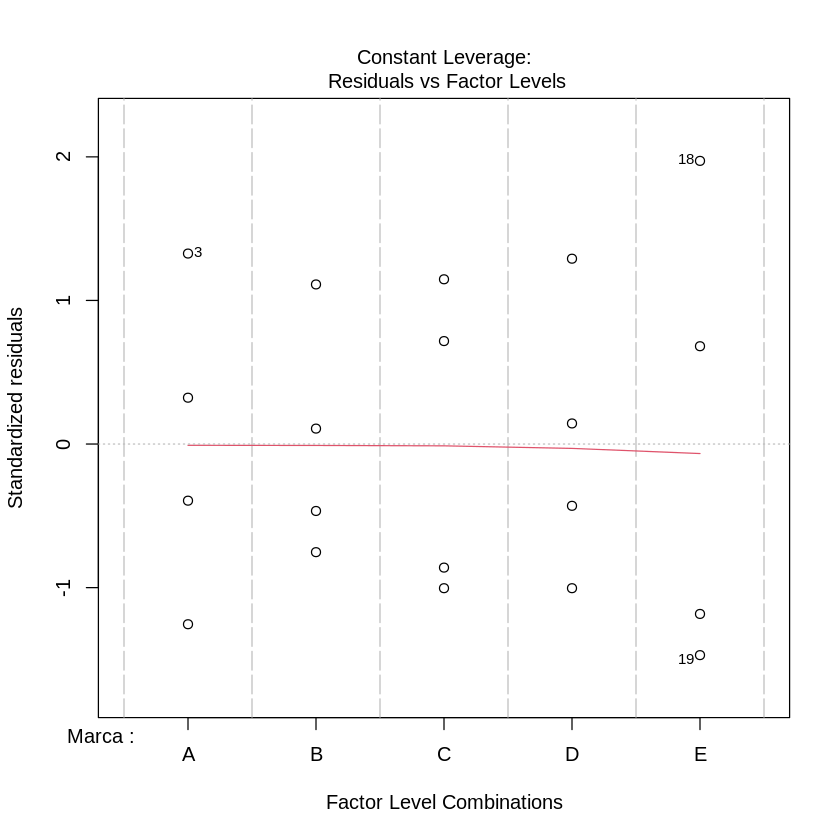

In [17]:
plot(modelo,5)

#### Independencia

In [18]:
dwtest(modelo)


	Durbin-Watson test

data:  modelo
DW = 2.436, p-value = 0.5258
alternative hypothesis: true autocorrelation is greater than 0


En efecto, el $p$ valor asociado al test de Durbin - Watson resulta $0.5258$, por lo que no se rechaza la hipótesis nula (H0), y se podría aseverar que hay independencia entre el conjunto de datos bajo análisis

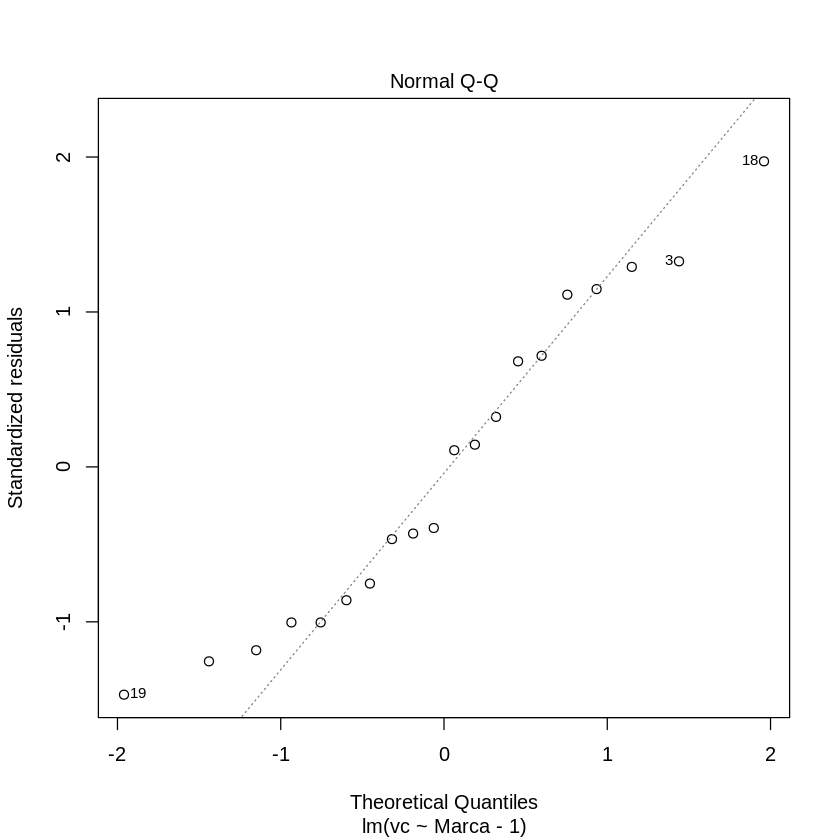

In [19]:
plot(modelo,2)

## Testear la hipótesis con un nivel de confianza del $95$% de que las marcas no difieren en el valor calórico

In [20]:
mean(vc)

[1] 28.485

In [21]:
z.test(vc, sigma.x=20,  conf.level=0.95)


	One-sample z-Test

data:  vc
z = 6.3694, p-value = 1.897e-10
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 19.71977 37.25023
sample estimates:
mean of x 
   28.485 


## Si las dos primeras marcas corresponden a cervezas blancas y las siguientes tres a cervezas negras, plantear un contraste que permita ver si existen diferencias en el valor calórico entre ambos tipos de cervezas

In [22]:
Tipo=c(rep("blanca",8),rep("negra",12))
Tipo=factor(Tipo)

In [23]:
df1=data.frame(Marca,vc,Tipo)
df1

Marca,vc,Tipo
<fct>,<dbl>,<fct>
A,31.5,blanca
A,32.0,blanca
A,32.7,blanca
A,30.9,blanca
B,32.3,blanca
B,31.9,blanca
B,33.0,blanca
B,31.7,blanca
C,28.8,negra


In [24]:
summary(df1)

 Marca       vc            Tipo   
 A:4   Min.   :23.90   blanca: 8  
 B:4   1st Qu.:25.38   negra :12  
 C:4   Median :28.25              
 D:4   Mean   :28.48              
 E:4   3rd Qu.:31.75              
       Max.   :33.00              

In [25]:
attach(df1)

The following objects are masked _by_ .GlobalEnv:

    Marca, Tipo, vc


The following objects are masked from df:

    Marca, vc




### Modelo de análisis, regresión lineal simple, con un factor de 2 niveles

El efecto de analizar si existen diferencias significativas entre los valores calóricos de los distintos tipos de cervezas, se ajusta a un modelo lineal de la forma:


$vc_{i,j}= \mu_{i}+\epsilon_{i,j}$

Donde:

- $i=BLANCA,NEGRA$
- $j=23.90,..,33$
- $vc_{i,j}$ es la observacion de las muestras de valores calóricos de los distintos tipos de cerveza $i,j$
- $\mu_i$ es el valor medio de la muestra de tipos de cerveza $i$
- $\epsilon_{i,j}$ es la variable aleatoria que representa la oscilación - error de los valores calóricos de las cervezas.

In [26]:
modelo1=lm(vc~Tipo-1)
summary(modelo1)


Call:
lm(formula = vc ~ Tipo - 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.24167 -0.90625 -0.07083  0.77500  2.95833 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
Tipoblanca  32.0000     0.5152   62.11   <2e-16 ***
Tiponegra   26.1417     0.4207   62.14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.457 on 18 degrees of freedom
Multiple R-squared:  0.9977,	Adjusted R-squared:  0.9974 
F-statistic:  3859 on 2 and 18 DF,  p-value: < 2.2e-16


## Mediante el test de tukey analizar si hay diferencias entre los tipos de cerveza

### Para los diferentes tipos de cerveza

In [27]:
ajuste1=aov(vc~Tipo-1)
compara1=glht(ajuste1,mcp(Tipo="Tukey"))
summary(compara1)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = vc ~ Tipo - 1)

Linear Hypotheses:
                    Estimate Std. Error t value Pr(>|t|)    
negra - blanca == 0  -5.8583     0.6652  -8.807 6.07e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


De acuerdo a estos resultados, hay diferencias significativas entre el tipo de cerveza negra y el tipo de cerveza blanca

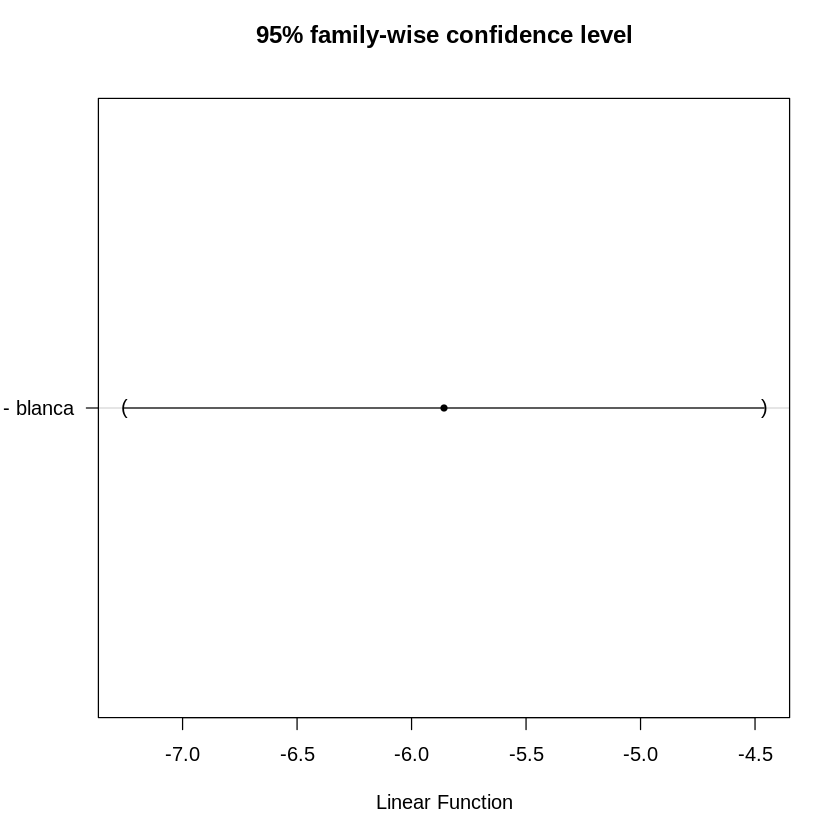

In [28]:
plot(compara1)

### Para las diferentes marcas de cerveza

In [29]:
ajuste2=aov(vc~Marca-1)
compara2=glht(ajuste2,mcp(Marca="Tukey"))
summary(compara2)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = vc ~ Marca - 1)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)    
B - A == 0   0.4500     0.5693   0.790 0.929458    
C - A == 0  -3.4750     0.5693  -6.104 0.000165 ***
D - A == 0  -6.5750     0.5693 -11.550  < 1e-04 ***
E - A == 0  -6.8500     0.5693 -12.033  < 1e-04 ***
C - B == 0  -3.9250     0.5693  -6.895  < 1e-04 ***
D - B == 0  -7.0250     0.5693 -12.340  < 1e-04 ***
E - B == 0  -7.3000     0.5693 -12.823  < 1e-04 ***
D - C == 0  -3.1000     0.5693  -5.445 0.000549 ***
E - C == 0  -3.3750     0.5693  -5.929 0.000223 ***
E - D == 0  -0.2750     0.5693  -0.483 0.987785    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


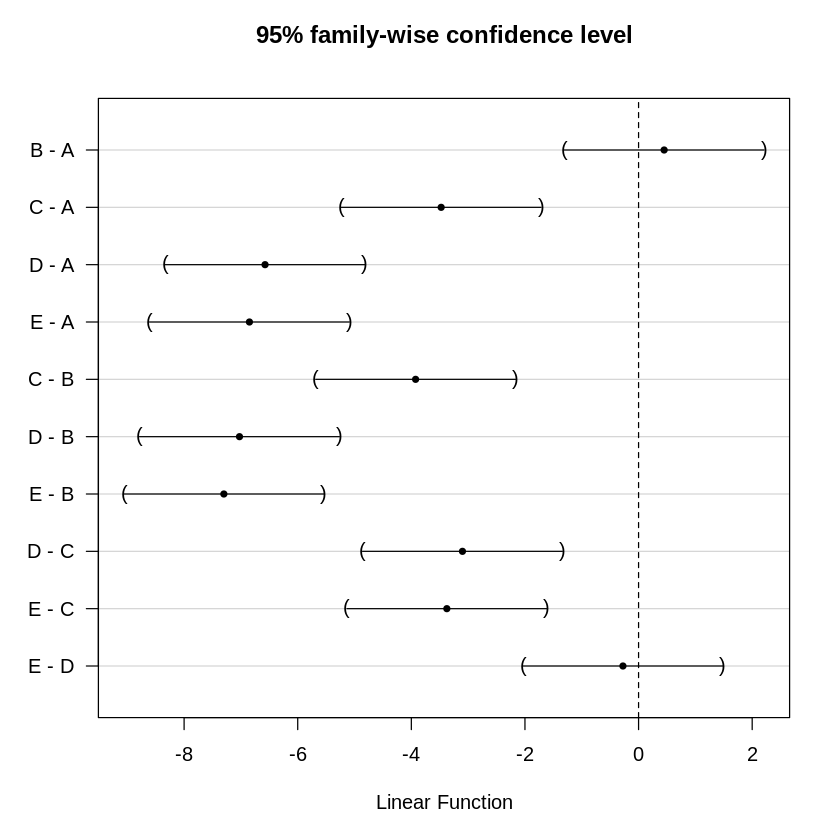

In [30]:
plot(compara2)

Se realizan comparaciones múltiples entre los valores calóricos medios por cada marca de cerveza, a través del test de Tukey, arrojando que no habrian diferencias significativas entre la marca A y la marca B, y tampoco lo habría entre la marca E y la marca D. 


## Hallar un intervalo de confianza del $95$% para la diferencia entre las marcas con mayor y menor valor calórico

In [31]:
mean(m1)

[1] 31.775

In [32]:
mean(m2)

[1] 32.225

In [33]:
mean(m3)

[1] 28.3

In [34]:
mean(m4)

[1] 25.2

In [35]:
mean(m5)

[1] 24.925

### Muestra con mayor valor calorico

In [36]:
z.test(m2, sigma.x=4,  conf.level=0.95)


	One-sample z-Test

data:  m2
z = 16.113, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 28.30507 36.14493
sample estimates:
mean of x 
   32.225 


### Muestra con menor valor calorico

In [37]:
z.test(m5, sigma.x=4,  conf.level=0.95)


	One-sample z-Test

data:  m5
z = 12.463, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 21.00507 28.84493
sample estimates:
mean of x 
   24.925 
